# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application


## Requesting the Data and Creating a BeautifulSoup

Let's begin by requesting from the site using the `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly we get from the `request.get`, we can use the .content method to see what we extracted. We can slice it so it won't flood our screen. You can delete the slicing if you want to fully see what we get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. Here we will use beautifulsoup, which transforms a complex HTML document into a complex tree of Python objects. 

Let's make a Beautifulsoup object and explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

By inspecting the elements on the site, we know that the data we need is contained within a `div` with the `"lister-list"` class. 
Inside `"lister-list"` we have multiple `"lister-item mode-advanced"` class `div`, each containing the data for each separate films.

In [4]:
table = soup.find(class_ = 'lister-list')
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7144666">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt7144666/">
    <img alt="The Black Phone" class="loadlate" data-tconst="tt7144666" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BOWVmNTBiYTUtZWQ3Yi00ZDlhLTgyYjUtNzBhZjM3YjRiNGRkXkEyXkFqcGdeQXVyNzYyOTM1ODI@._V1_UX67_CR0,0,6


We know that there are 50 movies we can pull. But by using `len` we can confirm that we have indeed pulled all 50 movies. Also we can assign this to a variable which will use later.

In [5]:
row = table.find_all(class_ = 'lister-item mode-advanced')
row_length = len(row)
row_length

50

We are looking to extract 4 different data from the site. The title, rating, metascore, and votes.

We can extract the title from a href attribute contained within the `'lister-item-header'` `div`. By using the loop function we will extract as many `'lister-item-header'` `div` as our row. And for each of this `div`, we will find the href attribute containing the word `'title'` which we need.

The ratings and votes data can be extracted in similar fashion by finding the right container `div` class, and the attribute containing the data we need.

Metascore can also be obtained the same way. But, since there are some films with no metascore we can use the if-else function to automatically set the empty values as `0`. 

In [6]:
import re

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    title = table.find_all(class_ = 'lister-item-header')[i]
    title = title.find(href=re.compile ('title')).text
    rating = table.find_all(class_ = 'inline-block ratings-imdb-rating')[i]
    rating = rating.find('strong').text
    metascore = table.find_all(class_ = 'ratings-bar')[i]
    metascore = metascore.find(class_ = 'inline-block ratings-metascore')
    if metascore == None:
        metascore = 0
    else:
        metascore = metascore.find('span').text.strip()
    votes = table.find_all(class_ = 'sort-num_votes-visible')[i]
    votes = votes.find_all('span')[1].text
    votes = votes.replace(',','')
    
    temp.append((title, rating, metascore, votes))
    
temp

[('The Black Phone', '7.3', '65', '22948'),
 ('Only Murders in the Building', '8.1', 0, '73188'),
 ('Sing 2', '7.4', '49', '55260'),
 ('Spider-Man: No Way Home', '8.3', '71', '671887'),
 ('1883', '8.8', 0, '55950'),
 ('No Time to Die', '7.3', '68', '372398'),
 ('Superman & Lois', '7.8', 0, '30517'),
 ('Last Night in Soho', '7.1', '65', '112541'),
 ('Hacks', '8.2', 0, '25088'),
 ('Dune: Part One', '8.0', '74', '587494'),
 ('Ghostbusters: Afterlife', '7.1', '45', '161654'),
 ('Mad God', '6.8', '80', '4562'),
 ('The Book of Boba Fett', '7.3', 0, '133524'),
 ("You Don't Know Me", '6.9', 0, '3859'),
 ('WandaVision', '7.9', 0, '300959'),
 ('Pleasure', '6.3', '75', '12116'),
 ('Old', '5.8', '55', '109165'),
 ('Eternals', '6.3', '52', '317940'),
 ('Invincible', '8.7', 0, '120913'),
 ('House of Gucci', '6.6', '59', '110377'),
 ('Resident Evil: Welcome to Raccoon City', '5.2', '44', '46829'),
 ('Licorice Pizza', '7.3', '90', '88821'),
 ('Ojing-eo geim', '8.0', 0, '424730'),
 ('Verdens verste men

## Creating data frame & Data wrangling

Put the array into a dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Title', 'Ratings', 'Metascore', 'Votes'))
df.head()

,Title,Ratings,Metascore,Votes
0,The Black Phone,7.3,65,22948
1,Only Murders in the Building,8.1,0,73188
2,Sing 2,7.4,49,55260
3,Spider-Man: No Way Home,8.3,71,671887
4,1883,8.8,0,55950


As a precaution, first we'll check for any missing values

In [9]:
df.isna().sum()

Title        0
Ratings      0
Metascore    0
Votes        0
dtype: int64

Since there are no missing values, we can continue with the data types and make adjustments where necessary

In [10]:
df.dtypes

Title        object
Ratings      object
Metascore    object
Votes        object
dtype: object

In [11]:
df['Ratings'] = df['Ratings'].astype('float')
df[['Metascore', 'Votes']] = df[['Metascore', 'Votes']].astype('int64')

In [12]:
df.dtypes

Title         object
Ratings      float64
Metascore      int64
Votes          int64
dtype: object

Next we'll change the index to the title to help with visualization 

In [13]:
df = df.set_index('Title')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Now, we will visualize the data using bar plots. We can then see the 7 highest rated films of 2021:
- Arcane: League of Legends
- 1883
- Invincible
- Dopesick
- Spiderman: No Way Home
- Loki
- Marcel the Shell with Shoes On

<AxesSubplot:title={'center':'Top 7 Highest Rated Films of 2021'}, xlabel='Title', ylabel='Rating'>

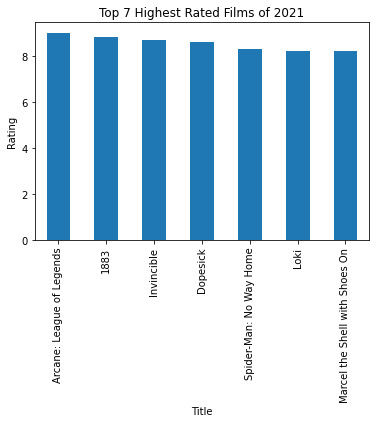

In [14]:
df['Ratings'].sort_values(ascending = False).head(7).plot.bar(title = 'Top 7 Highest Rated Films of 2021',
                              ylabel = 'Rating')

We can also see the 7 films with the highest votes in 2021:
- Spiderman: No Way Home
- Dune: Part One
- Don't Look Up
- Ojing-eo geim
- No Time to Die
- Shang-Chi
- Free Guy

<AxesSubplot:title={'center':'Top 7 Highest Voted Films of 2021'}, xlabel='Title', ylabel='Votes'>

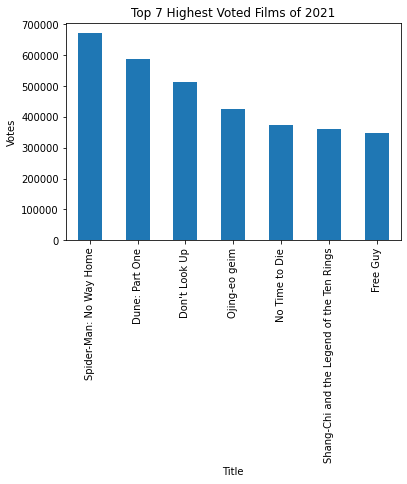

In [15]:
df['Votes'].sort_values(ascending = False).head(7).plot.bar(title = 'Top 7 Highest Voted Films of 2021',
                              ylabel = 'Votes')

Interestingly, only Spiderman: No Way Home is both highly rated and also the highest voted. 

Finally, we can see if there is any correlation between the two variables. Does number of votes impact ratings and vice versa?

<AxesSubplot:title={'center':'Votes Received vs Ratings'}, xlabel='Votes', ylabel='Ratings'>

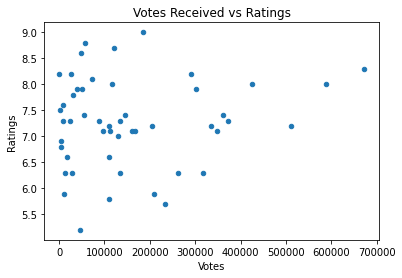

In [19]:
df.plot.scatter(title = 'Votes Received vs Ratings', x = 'Votes', y = 'Ratings')

 From the scatterplot graph above, we can see that there are no correlation between votes and ratings

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.